In [1]:
import webbrowser
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
# name of data file >>
fileName = r"trade_network"

df = pd.read_csv(fileName +'.csv')

df.info()
print('\nNumber of NaN values in columns  >>\n',df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country1     1870 non-null   object 
 1   country2     1870 non-null   object 
 2   val_exp_ijp  1870 non-null   float64
dtypes: float64(1), object(2)
memory usage: 44.0+ KB

Number of NaN values in columns  >>
 country1       0
country2       0
val_exp_ijp    0
dtype: int64


In [3]:
# load functions located in "my_lib_path" >>>
from my_tests import tabstat

In [4]:
display(tabstat(3, df))

,count,mean,std,min,max
val_exp_ijp,1870.0,6850247.058,4.989547e+07,1.0,1.471929e+09


Text(0, 0.5, 'Количество')

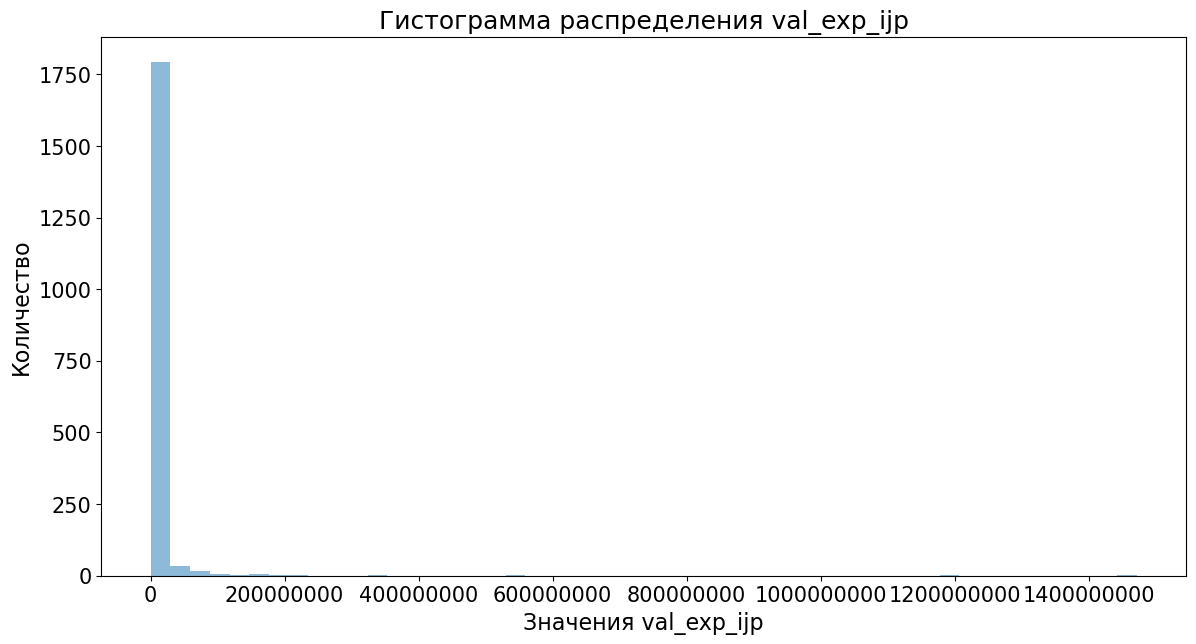

In [5]:
# histogram >>>
plt.subplots(figsize=(14,7))
plt.hist(df.val_exp_ijp, bins=50, alpha=0.5)
plt.tick_params(labelsize=15)
## Arsen Tokkozhin 18.05.2024 !!! >>>
plt.ticklabel_format(style='plain')
## Alim Khanmurzin 18.05.2024 >>>
plt.title('Гистограмма распределения val_exp_ijp',
          fontsize=18)
plt.xlabel('Значения val_exp_ijp', fontsize=16)
plt.ylabel('Количество', fontsize=16)

Text(0, 0.5, 'Количество')

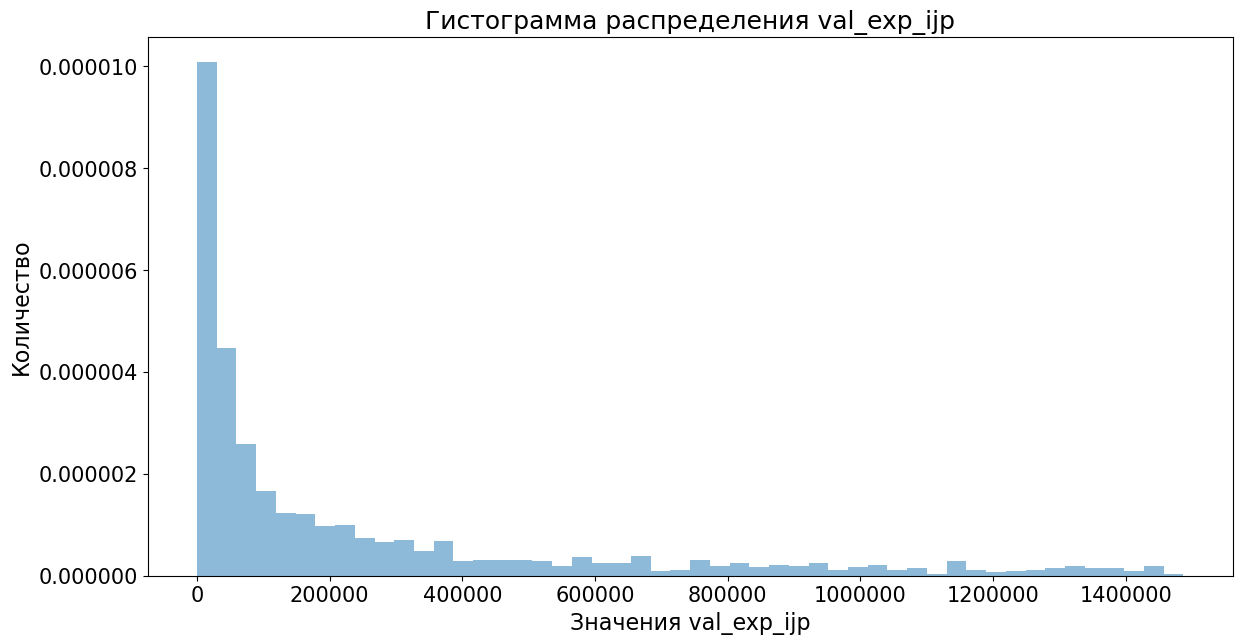

In [6]:
plt.subplots(figsize=(14,7))
plt.hist(df.val_exp_ijp.loc[df.val_exp_ijp<0.15e+07],
         density=True, bins=50, alpha=0.5)
plt.tick_params(labelsize=15)
# Arsen Tokkozhin 18.05.2024 !!! >>>
plt.ticklabel_format(style='plain')
## Alim Khanmurzin 18.05.2024 >>>
plt.title('Гистограмма распределения val_exp_ijp',
          fontsize=18)
plt.xlabel('Значения val_exp_ijp', fontsize=16)
plt.ylabel('Количество', fontsize=16)

In [7]:
# create a directed graph called G >>>
G = nx.DiGraph()

# Build the network by adding each row of data 
#  as an edge between two nodes >>>
for i in df.index:
  G.add_edge(df.country1[i], df.country2[i],
             weight=df.val_exp_ijp[i])
#  print(i, end=' ')

In [8]:
# just check the data... >>>
usachnexp = G.edges[('USA','CHN')]['weight']
print('\nUSA 2012 scrap aluminum exports to China, in USD: '
      + str(usachnexp))


USA 2012 scrap aluminum exports to China, in USD: 1199682944.0


In [9]:
# Calculate eigenvector centrality of G 
# with export values as weights
ec = nx.eigenvector_centrality_numpy(G, weight='weight')

# Set this as a node attribute for each node
nx.set_node_attributes(G, ec, 'cent')

# Use this measure to determine the node color in visualization
node_color = [float(G.nodes[i]['cent']) for i in G]

In [10]:
# Blank dictionary to store total exports
totexp = {}
'''
G.out_edges('CAN', 'weight')
'''
# Calculate total exports of each country in the network
for exp in G.nodes():
  tx=sum([float(g) for exp,f,g in G.out_edges(exp, 'weight')])
  totexp[exp] = tx
#  avgexp = np.mean(tx)   # <- typo in Brian Dew's post
#  print(exp,' ',tx,' ',avgexp)

nx.set_node_attributes(G, totexp, 'totexp')

## U may change size of nodes
## (Brian Dew's post corrected) >>
avgexp = np.mean( list(totexp.values()) ) / 500
avgexp

# Use the results later for the node's size in the graph
node_size = [float(G.nodes[i]['totexp']) / avgexp for i in G]

(-0.9919841968011262,
 1.094856390323863,
 -0.9825135836885608,
 1.0053072577890905)

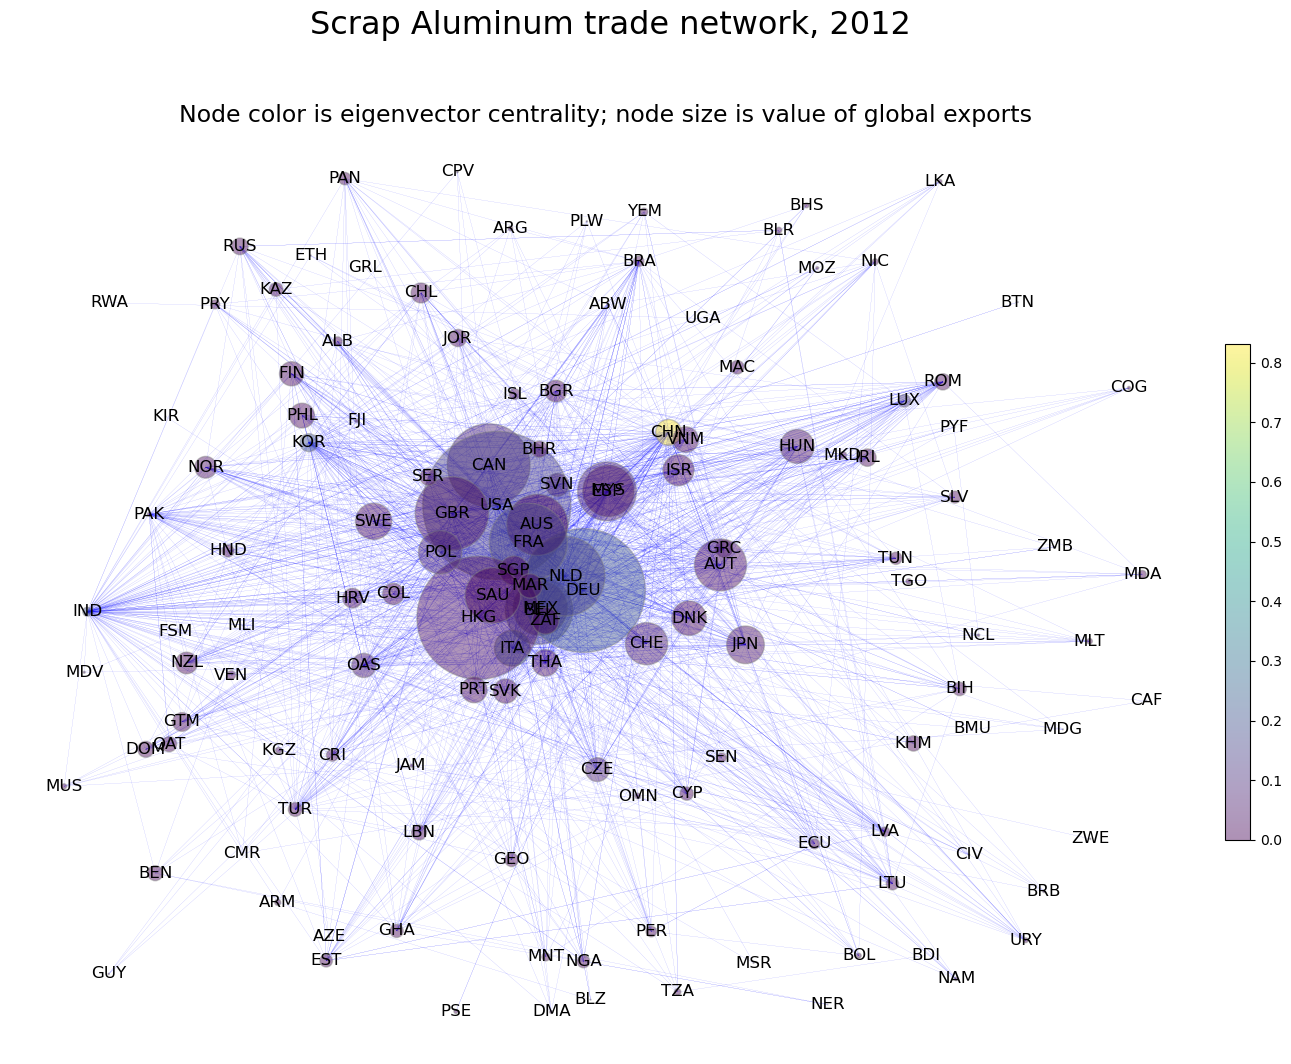

In [11]:
#
## Visualization of the scrap aluminum network >>>
#

plt.subplots(figsize=(16,12))

# Calculate position of each node in G using networkx spring layout
pos = nx.spring_layout(G, k=40, iterations=5, seed=3)

# Draw nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               node_color=node_color, alpha=0.43) 
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edge_color='b',
                               arrows=False, width=0.05,)

# Add labels
nx.draw_networkx_labels(G,pos,font_size=12)
nodes.set_edgecolor('gray')

# Add title
plt.suptitle('Scrap Aluminum trade network, 2012', fontsize=23)
plt.title('Node color is eigenvector centrality;\
 node size is value of global exports', fontsize=17)

# Bar with color scale for eigenvalues
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None,
                    fraction=0.02, pad=0.02)

# Plot options
plt.margins(0,0)
plt.axis('off')


In [12]:
df2=pd.DataFrame()

df2['totexp'] = [float(G.nodes[i]['totexp']) for i in G]
df2['cent'] = [float(G.nodes[i]['cent']) for i in G]
df2['nodes'] = [i for i in G]

In [13]:
## sort by export >>
df2.sort_values(by='totexp', ascending=False, inplace=True)
df2[:30]

,totexp,cent,nodes
8,2.154950e+09,0.141543,USA
13,1.506302e+09,0.210268,DEU
33,1.490811e+09,0.021995,HKG
1,6.735687e+08,0.071030,CAN
19,6.200999e+08,0.146308,NLD
32,5.985255e+08,0.150006,FRA
14,5.306820e+08,0.025232,GBR
11,4.465239e+08,0.141115,BEL
27,3.666199e+08,0.000075,AUS
30,3.405766e+08,0.064860,ESP


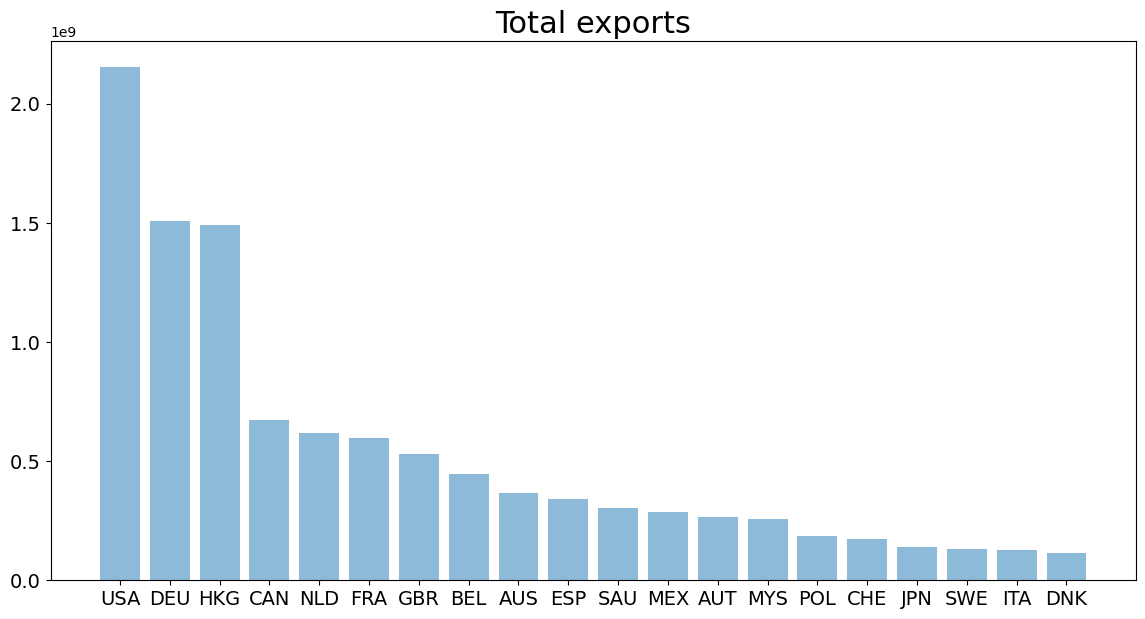

In [14]:
# total exports >>>
plt.subplots(figsize=(14,7))
plt.bar(df2.nodes[:20], df2.totexp[:20], alpha=.5)
plt.title('Total exports', fontsize=22)
plt.tick_params(labelsize=14)

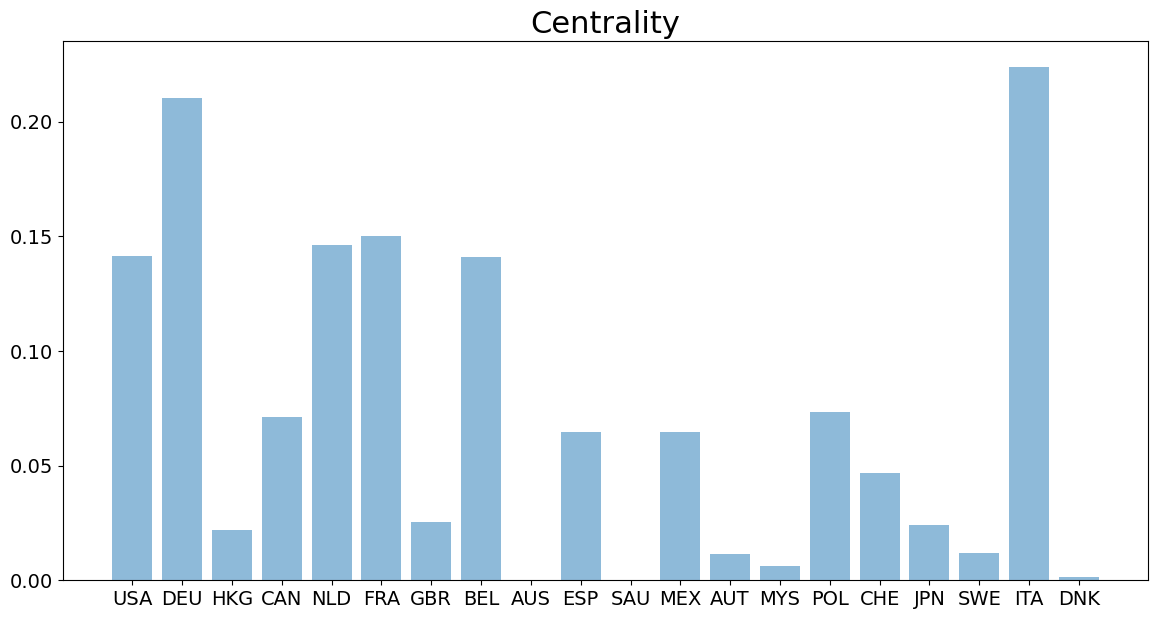

In [15]:
# centrality >>>
plt.subplots(figsize=(14,7))
plt.bar(df2.nodes[:20], df2.cent[:20], alpha=.5)
plt.title('Centrality', fontsize=22)
plt.tick_params(labelsize=14)

In [16]:
# repeat the above plots sorted by centrality !!!
df2.sort_values(by='cent', ascending=False, inplace=True)

In [17]:
#
### now it will be IMPORT >>>
#
g = nx.DiGraph()
for i in df.index:
  g.add_edge(df.country2[i], df.country1[i],
             weight=df.val_exp_ijp[i])

In [18]:
# Calculate eigenvector centrality of 'g'
# with IMPORT values as weights
ec = nx.eigenvector_centrality_numpy(g, weight='weight')

# Set this as a node attribute for each node
nx.set_node_attributes(g, ec, 'cent')

# Use this measure to determine the node color in visualization
node_color = [float(g.nodes[i]['cent']) for i in g]

In [19]:
# Blank dictionary to store total IMPORTs
totexp = {}

# Calculate total exports of each country in the network
for exp in g.nodes():
  tx=sum([float(g) for exp,f,g in g.out_edges(exp, 'weight')])
  totexp[exp] = tx
     
nx.set_node_attributes(g, totexp, 'totexp')

# Use the results later for the node's size in the graph
node_size = [float(g.nodes[i]['totexp']) / avgexp for i in g]

(-1.081166613411393,
 1.0417785757923785,
 -0.9719571695331013,
 1.093902722358719)

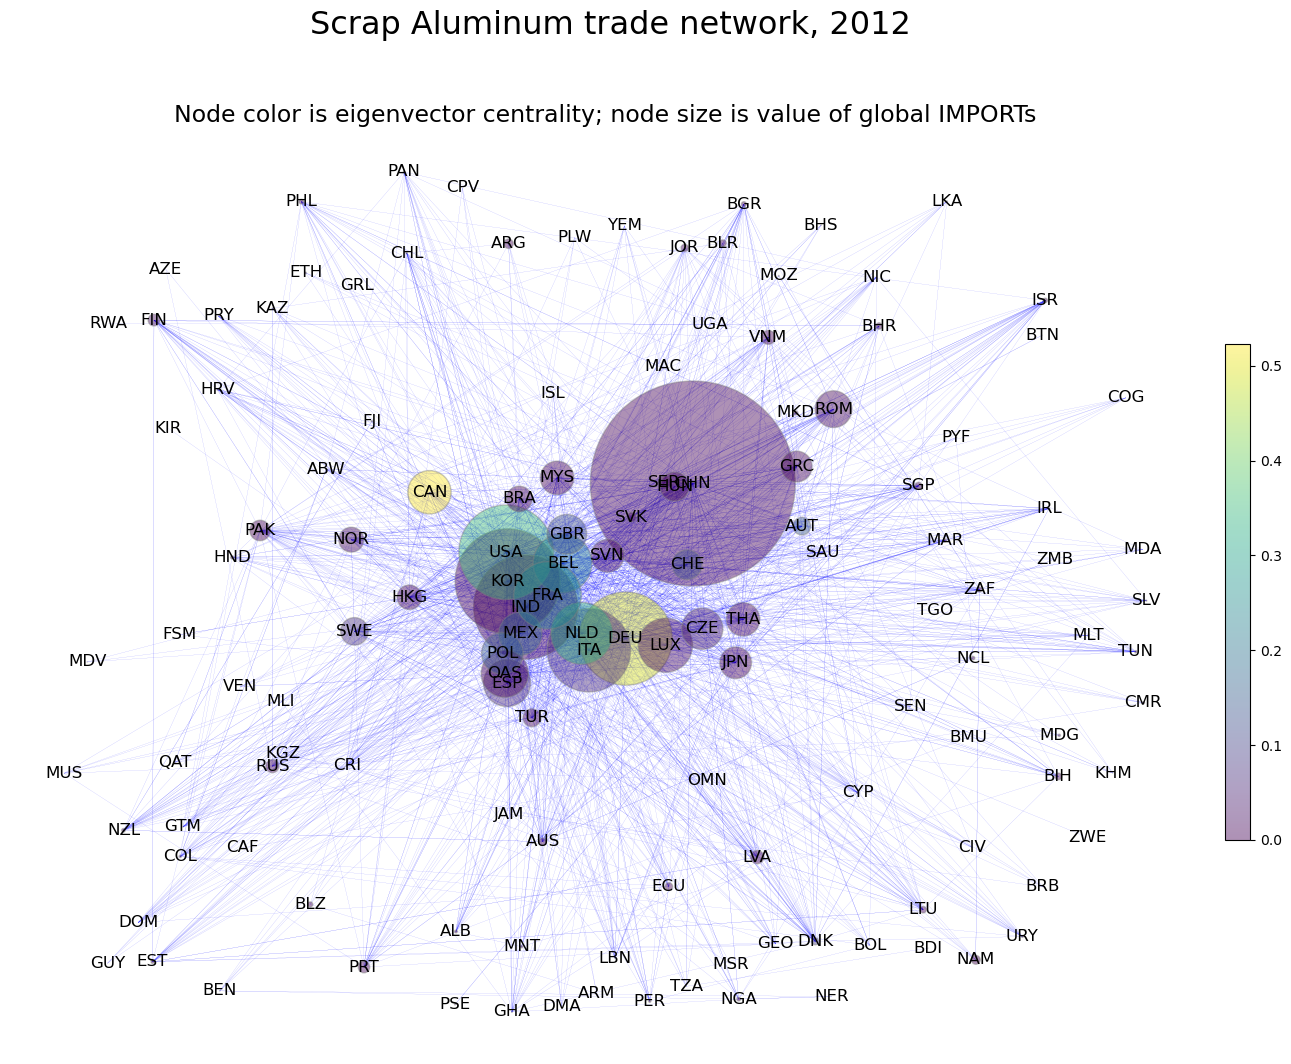

In [20]:
#
## Visualization of the scrap aluminum network >>>
#

plt.subplots(figsize=(16,12))

# Calculate position of each node in 'g' using networkx spring layout
pos = nx.spring_layout(g, k=40, iterations=5, seed=3)

# Draw nodes
nodes = nx.draw_networkx_nodes(g, pos, node_size=node_size,
                               node_color=node_color, alpha=0.43) 
# Draw edges
edges = nx.draw_networkx_edges(g, pos, edge_color='b',
                               arrows=False, width=0.05,)

# Add labels
nx.draw_networkx_labels(g,pos,font_size=12)
nodes.set_edgecolor('gray')

# Add title
plt.suptitle('Scrap Aluminum trade network, 2012', fontsize=23)
plt.title('Node color is eigenvector centrality;\
 node size is value of global IMPORTs', fontsize=17)

# Bar with color scale for eigenvalues
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None,
                    fraction=0.02, pad=0.02)

# Plot options
plt.margins(0,0)
plt.axis('off')

In [21]:
df3=pd.DataFrame()

df3['totexp'] = [float(g.nodes[i]['totexp']) for i in g]
df3['cent'] = [float(g.nodes[i]['cent']) for i in g]
df3['nodes'] = [i for i in g]

In [22]:
## sort by IMPORT >>
df3.sort_values(by='totexp', ascending=False, inplace=True)
df3[:30]

,totexp,cent,nodes
2,4.130642e+09,0.001319,CHN
5,1.084871e+09,0.001032,KOR
4,1.063137e+09,0.000323,IND
8,8.787411e+08,0.357788,USA
13,8.534031e+08,0.490922,DEU
17,6.825242e+08,0.060514,ITA
32,4.473951e+08,0.243581,FRA
19,3.751098e+08,0.337375,NLD
10,3.405830e+08,0.230434,BEL
35,2.895460e+08,0.017378,LUX


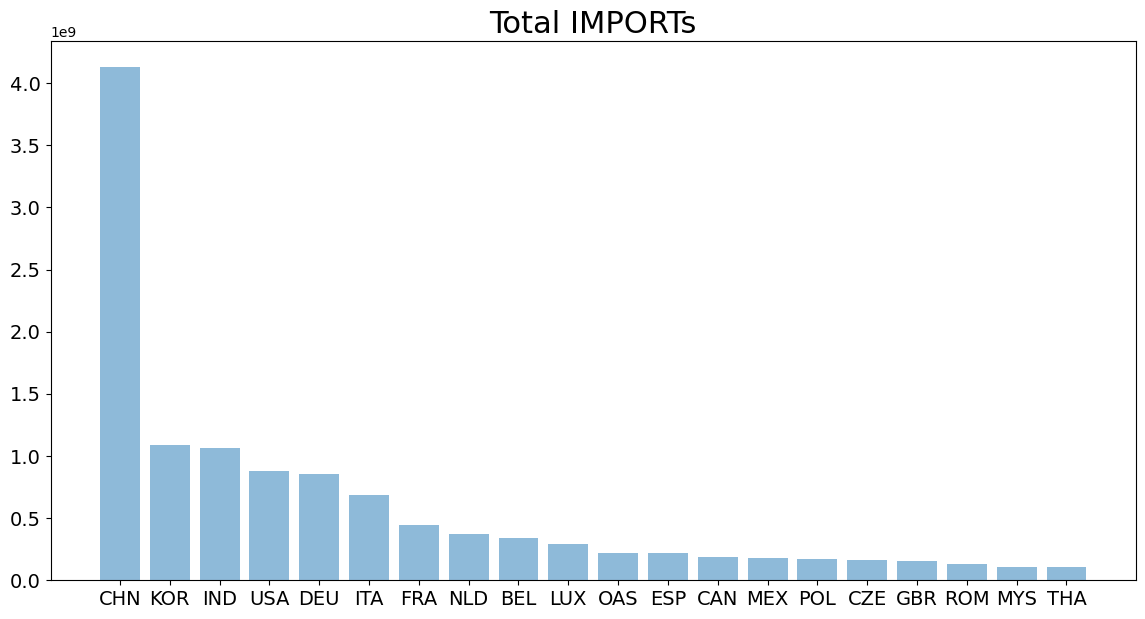

In [23]:
# total IMPORTs >>>
plt.subplots(figsize=(14,7))
plt.bar(df3.nodes[:20], df3.totexp[:20], alpha=.5)
plt.title('Total IMPORTs', fontsize=22)
plt.tick_params(labelsize=14)

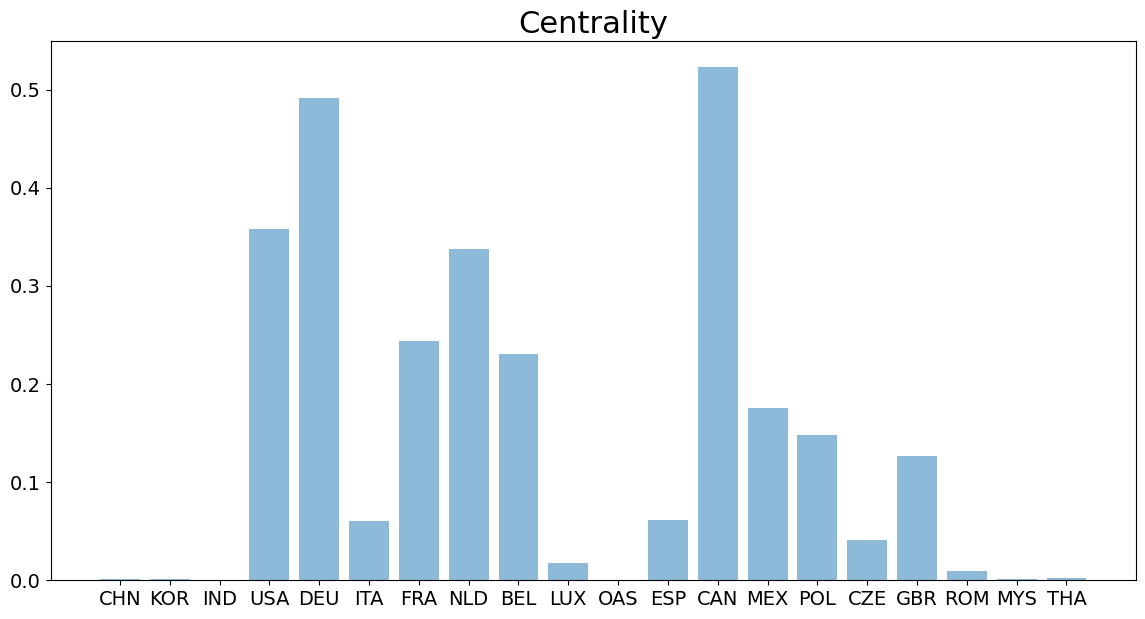

In [24]:
# centrality >>>
plt.subplots(figsize=(14,7))
plt.bar(df3.nodes[:20], df3.cent[:20], alpha=.5)
plt.title('Centrality', fontsize=22)
plt.tick_params(labelsize=14)

In [25]:
# repeat the above plots sorted by centrality !!!
df3.sort_values(by='cent', ascending=False, inplace=True)

(-0.9919841968011262,
 1.094856390323863,
 -0.9825135836885608,
 1.0053072577890905)

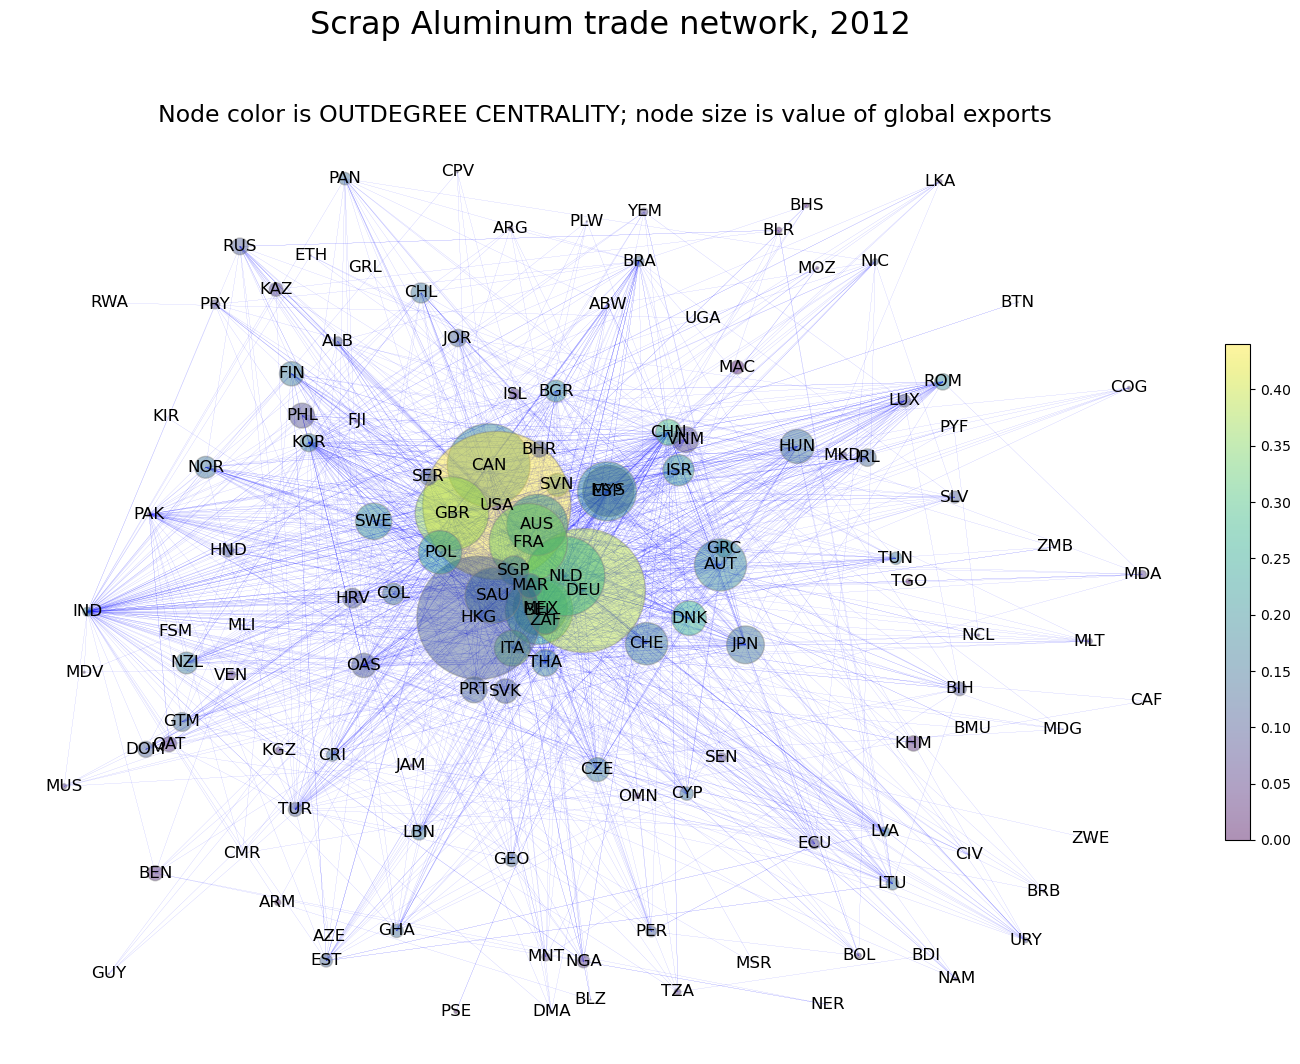

In [26]:
# Calculate OUTDEGREE CENTRALITY of G 
# with export values as weights
#ec = nx.eigenvector_centrality_numpy(G, weight='weight')
oc = nx.out_degree_centrality(G) # <- replaces ec in the above

# Set this as a node attribute for each node
nx.set_node_attributes(G, oc, 'cent')

# Use this measure to determine the node color in visualization
node_color = [float(G.nodes[i]['cent']) for i in G]
#%%

# Blank dictionary to store total exports
totexp = {}
'''
G.out_edges('CAN', 'weight')
'''
# Calculate total exports of each country in the network
for exp in G.nodes():
  tx=sum([float(g) for exp,f,g in G.out_edges(exp, 'weight')])
  totexp[exp] = tx

nx.set_node_attributes(G, totexp, 'totexp')

# Use the results later for the node's size in the graph
node_size = [float(G.nodes[i]['totexp']) / avgexp for i in G]
#%%

#
## Visualization of the scrap aluminum network >>>
#

plt.subplots(figsize=(16,12))

# Calculate position of each node in G using networkx spring layout
pos = nx.spring_layout(G, k=40, iterations=5, seed=3)

# Draw nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               node_color=node_color, alpha=0.43) 
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edge_color='b',
                               arrows=False, width=0.05,)

# Add labels
nx.draw_networkx_labels(G,pos,font_size=12)
nodes.set_edgecolor('gray')

# Add title
plt.suptitle('Scrap Aluminum trade network, 2012', fontsize=23)
plt.title('Node color is OUTDEGREE CENTRALITY;\
 node size is value of global exports', fontsize=17)

# Bar with color scale for eigenvalues
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None,
                    fraction=0.02, pad=0.02)

# Plot options
plt.margins(0,0)
plt.axis('off')

In [27]:
df4=pd.DataFrame()

df4['totexp'] = [float(G.nodes[i]['totexp']) for i in G]
df4['cent'] = [float(G.nodes[i]['cent']) for i in G]
df4['nodes'] = [i for i in G]

In [28]:
## sort by export >>
df4.sort_values(by='totexp', ascending=False, inplace=True)
df4[:30]

,totexp,cent,nodes
8,2.154950e+09,0.440299,USA
13,1.506302e+09,0.388060,DEU
33,1.490811e+09,0.111940,HKG
1,6.735687e+08,0.186567,CAN
19,6.200999e+08,0.283582,NLD
32,5.985255e+08,0.343284,FRA
14,5.306820e+08,0.365672,GBR
11,4.465239e+08,0.261194,BEL
27,3.666199e+08,0.201493,AUS
30,3.405766e+08,0.201493,ESP


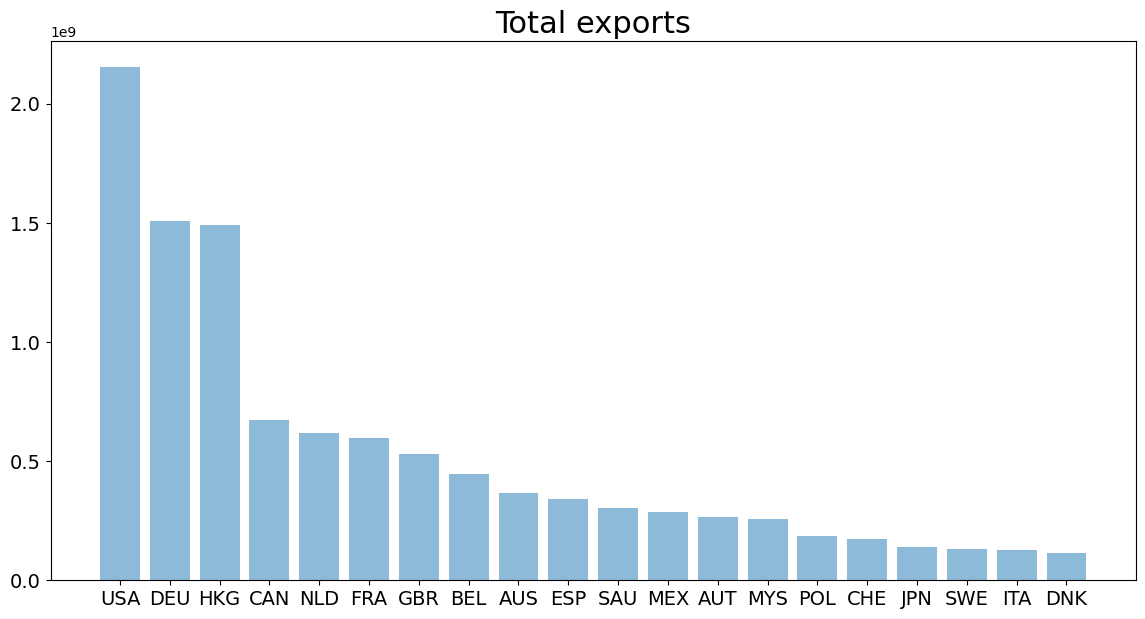

In [29]:
# total exports >>>
plt.subplots(figsize=(14,7))
plt.bar(df4.nodes[:20], df4.totexp[:20], alpha=.5)
plt.title('Total exports', fontsize=22)
plt.tick_params(labelsize=14)

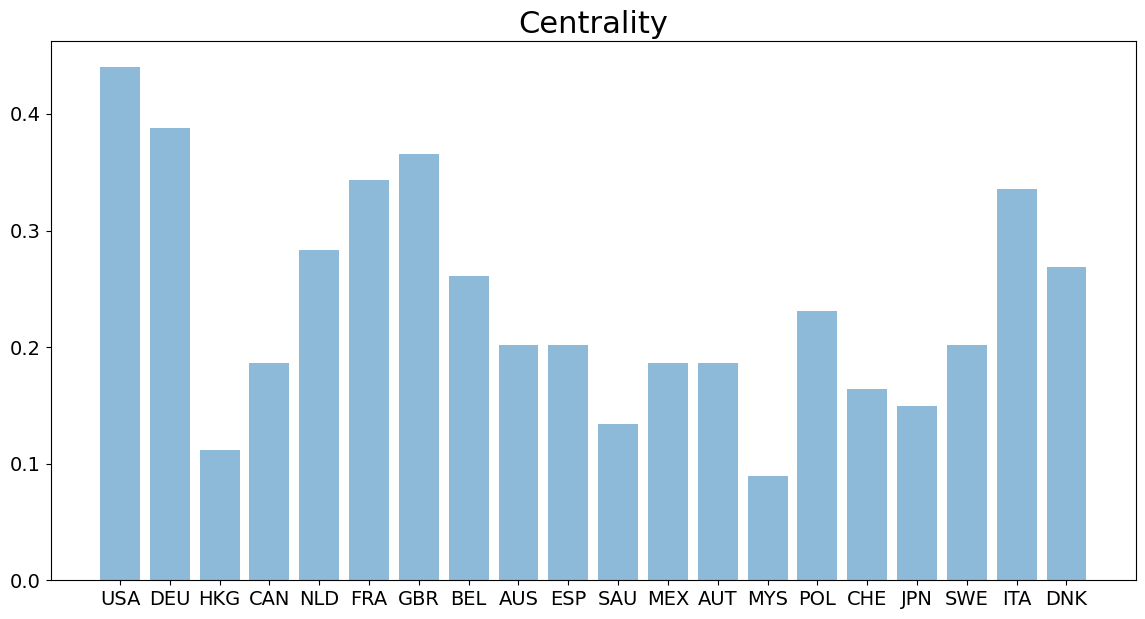

In [30]:
# centrality >>>
plt.subplots(figsize=(14,7))
plt.bar(df4.nodes[:20], df4.cent[:20], alpha=.5)
plt.title('Centrality', fontsize=22)
plt.tick_params(labelsize=14)

In [31]:
# repeat the above plots sorted by centrality !!!
df4.sort_values(by='cent', ascending=False, inplace=True)

In [32]:
####
####  Let us find cliques in a graph !!!
#### It may be used in some trading algorithms.
####

# convert to undirected graph >>>
G2 = G.to_undirected()
list(G2.edges)
list(nx.find_cliques(G2))

# the largest clique >>>
max(nx.find_cliques(G2), key = len)
len(max(nx.find_cliques(G2), key = len))

17